# PyCaretで最も性能のよいアルゴリズムを探索
- re78をターゲットにする


In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, display_markdown, Markdown
from textwrap import dedent

import warnings
warnings.filterwarnings('ignore')

import pycaret.classification as caret_cls


## Lalando-LoadData-RLang.ipynbで作成したCSVファイルを読み込む

In [2]:
data1 = pd.read_csv('cps1_nsw_data_R.csv')
data3 = pd.read_csv('cps3_nsw_data_R.csv')
data0 = pd.read_csv('nsw_dw_R.csv')

data3['treat'].value_counts()

0    429
1    185
Name: treat, dtype: int64

In [3]:
data = data0.copy()


x_names = ['re74', 're75',  'age', 'education', 'black',
                'hispanic', 'nodegree', 'married'] 
z_name = 'treat'
y_name = 're78'

all_columns = x_names + [ z_name ]

setup_results = caret_cls.setup(data=data[ all_columns ], target=z_name, 
                                numeric_features=x_names)

,Description,Value
0,session_id,2454
1,Target,treat
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(445, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
caret_cls.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6145,0.0000,0.3692,0.6014,0.4487,0.1783,0.1943,0.0050
lda,Linear Discriminant Analysis,0.6145,0.5927,0.3692,0.6014,0.4487,0.1783,0.1943,0.0060
lr,Logistic Regression,0.6082,0.5849,0.3764,0.5977,0.4505,0.1690,0.1857,0.2200
nb,Naive Bayes,0.5824,0.5784,0.4132,0.5293,0.4581,0.1266,0.1322,0.0070
qda,Quadratic Discriminant Analysis,0.5820,0.5456,0.4720,0.5210,0.4900,0.1372,0.1396,0.0070
ada,Ada Boost Classifier,0.5792,0.5707,0.3615,0.5250,0.4194,0.1083,0.1157,0.0320
catboost,CatBoost Classifier,0.5696,0.5600,0.3753,0.5207,0.4256,0.0937,0.1027,0.7430
gbc,Gradient Boosting Classifier,0.5569,0.5441,0.3918,0.4926,0.4309,0.0755,0.0795,0.0250
lightgbm,Light Gradient Boosting Machine,0.5533,0.5265,0.4209,0.4810,0.4424,0.0744,0.0753,0.0570
et,Extra Trees Classifier,0.5243,0.5069,0.3709,0.4488,0.4044,0.0130,0.0142,0.1010


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2454,
                solver='auto', tol=0.001)

In [6]:
model_lda = caret_cls.create_model('lda', cross_validation=False)
model_lda = caret_cls.tune_model(estimator=model_lda, n_iter=30, early_stopping_max_iters=5 ,
                                 early_stopping=True, choose_better=True, optimize='F1')
model_lda

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5496,0.3571,0.4167,0.3846,-0.0323,-0.0325
1,0.5806,0.6303,0.3077,0.5000,0.3810,0.0903,0.0964
2,0.7097,0.7393,0.4615,0.7500,0.5714,0.3702,0.3952
3,0.6452,0.5812,0.3846,0.6250,0.4762,0.2302,0.2458
4,0.6129,0.6581,0.1538,0.6667,0.2500,0.1100,0.1641
5,0.6129,0.4829,0.3846,0.5556,0.4545,0.1696,0.1765
6,0.6452,0.5231,0.4286,0.6667,0.5217,0.2603,0.2764
7,0.6129,0.6050,0.5000,0.5833,0.5385,0.2085,0.2103
8,0.6129,0.6176,0.3571,0.6250,0.4545,0.1878,0.2055
9,0.6129,0.5378,0.3571,0.6250,0.4545,0.1878,0.2055


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [7]:
model_lda = caret_cls.create_model('ridge', cross_validation=False)
model_lda = caret_cls.tune_model(estimator=model_lda, n_iter=30, early_stopping_max_iters=5 ,
                                 early_stopping=True, choose_better=True, optimize='F1')
model_lda

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4688,0.0000,0.3571,0.3846,0.3704,-0.0880,-0.0882
1,0.5806,0.0000,0.3077,0.5000,0.3810,0.0903,0.0964
2,0.7097,0.0000,0.4615,0.7500,0.5714,0.3702,0.3952
3,0.6452,0.0000,0.3846,0.6250,0.4762,0.2302,0.2458
4,0.6129,0.0000,0.1538,0.6667,0.2500,0.1100,0.1641
5,0.5806,0.0000,0.3846,0.5000,0.4348,0.1104,0.1128
6,0.6452,0.0000,0.4286,0.6667,0.5217,0.2603,0.2764
7,0.6452,0.0000,0.5714,0.6154,0.5926,0.2791,0.2797
8,0.6129,0.0000,0.3571,0.6250,0.4545,0.1878,0.2055
9,0.6129,0.0000,0.3571,0.6250,0.4545,0.1878,0.2055


RidgeClassifier(alpha=5.17, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=False, random_state=2454,
                solver='auto', tol=0.001)

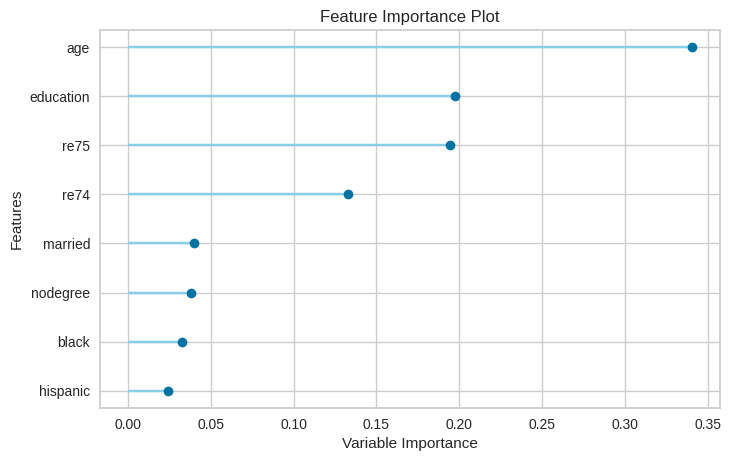

In [15]:
caret_cls.plot_model(model, plot='feature')